In [58]:
! codecarbon init

/Users/jules/Projects/green-hackathon/env/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(

Welcome to CodeCarbon, here is your experiment id:
36202bc8-704c-4a58-8360-6af08a6b282f (from ./.codecarbon.config)



In [59]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from codecarbon import EmissionsTracker

# Load the MPEG dataset
file_path = 'data/auto-mpg.csv'
mpeg_data = pd.read_csv(file_path, na_values='?')

# Drop the rows with missing values
mpeg_data = mpeg_data.dropna()

# Explore the dataset
print(mpeg_data.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


In [60]:
# Drop non-numeric columns
mpeg_data = mpeg_data.drop(['car name', 'origin'], axis=1)

# Extract features and target variable
X = mpeg_data.drop('mpg', axis=1)  # Replace 'target_column' with the actual target column name
y = mpeg_data['mpg']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Introduce polynomial features
degree = 2  # You can adjust the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Initialize the Linear Regression model
model = LinearRegression()

In [61]:
tracker = EmissionsTracker()
tracker.start()

# Train the model
model.fit(X_train_poly, y_train)

# Evaluate the model impact
emissions = tracker.stop()

print(f"Total emissions: {emissions} kg")

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

[codecarbon INFO @ 15:11:40] [setup] RAM Tracking...
[codecarbon INFO @ 15:11:40] [setup] GPU Tracking...
[codecarbon INFO @ 15:11:40] No GPU found.
[codecarbon INFO @ 15:11:40] [setup] CPU Tracking...
[codecarbon WARNING @ 15:11:40] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 15:11:40] CPU Model on constant consumption mode: Apple M1
[codecarbon INFO @ 15:11:40] >>> Tracker's metadata:
[codecarbon INFO @ 15:11:40]   Platform system: macOS-14.0-arm64-arm-64bit
[codecarbon INFO @ 15:11:40]   Python version: 3.9.6
[codecarbon INFO @ 15:11:40]   CodeCarbon version: 2.3.1
[codecarbon INFO @ 15:11:40]   Available RAM : 16.000 GB
[codecarbon INFO @ 15:11:40]   CPU count: 8
[codecarbon INFO @ 15:11:40]   CPU model: Apple M1
[codecarbon INFO @ 15:11:40]   GPU count: None
[codecarbon INFO @ 15:11:40]   GPU model: None
[codecarbon INFO @ 15:11:43] Energy consumed for RAM : 0.000000 kWh. RAM Power : 6.0 W
[codecarbon INFO @ 15:11:43] Energy consumed for all C

Total emissions: 8.920190817779966e-10 kg


In [62]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 7.070524098605563
R-squared: 0.8614725058023415


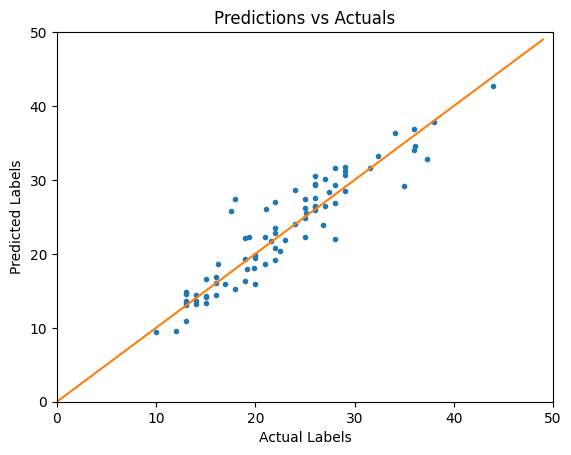

In [63]:
# Visualize the results
plt.plot(y_test, y_pred, '.')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
# Keep same scale for both axes
plt.xlim(0, 50)
plt.ylim(0, 50)

# Plot a line, a perfect prediction would all fall on this line
x = y = range(50)
plt.plot(x, y)

plt.show()
